# LogNormal Distribution Parameters
    
*Note to Robert: modified from* `uncertainty-1/continuous_distributions_lognormal-R.ipynb`  
*Original included* `Wind_Speed_1974_1975.csv`

The following functions are written from scratch:
- Probability density, PDF: $f(x)$  
    - The PDF of the lognormal distribution is given by: 
    $f(x)$ = $\frac{1}{\sigma_y \cdot x \cdot \sqrt{2 \pi}} exp[\frac{-(\ln{x} - \mu_y)^{2}}{2 \sigma_y^2}]$
- Cumulative distribution function, CDF: $F(x)$  
    - The CDF of the lognormal distribution is given by: 
    $F(x)$ = $\frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{x} exp[\frac{-(\ln{x} - \mu_y)^{2}}{2 \sigma_y^2}]$
    - The integration can be done using the quad function of scipy.optimize
        - To use this function you first define a function to be integrated and pass this to the quad function, together with the lower and upper boundaries
- Inverse cumulative distribution function , which is the complement of the CDF: $1-F(x)$  
    - The inverse CDF is given by $1-F(x)$, with $F(x)$ the CDF, defined as above 

All functions take as input $\sigma_y$ and $\mu_y$, so these are first computed from $\sigma_x$ and $\mu_x$, which are the standard deviation and mean of the data.
$\sigma_y$ and $\mu_y$ and $\sigma_x$ and $\mu_x$ are related via:
- $\sigma_y$ = $\sqrt{\ln{1 + \frac{\sigma_x}{\mu_x}^2}}$
- $\mu_y$ = $\ln{\mu_x} - \frac{\sigma_y^2}{2}$

In [10]:
import numpy as np 
from scipy.stats import norm, lognorm

Notes:
- can define with alternate parameters
- no documentation in function?
- 

mean and std of data: 5.355615525953148 2.871661857479071
calculated values: 1.551791902375222 0.5027001871384174

In [27]:
calc_values[0]

1.551791902375222

In [29]:
# Finding the moments and parameters of the dataset
mu_x = 5.356
sigma_x = 2.872

def lognorm_parameters(mu_x, sigma_x):
    sigma_y = np.sqrt(np.log(1 + (sigma_x/mu_x)**2))
    mu_y = np.log(mu_x) - 0.5*sigma_y**2
    return mu_y, sigma_y

calc_values = lognorm_parameters(5.355615525953148, 2.871661857479071)
test_values = (1.551791902375222, 0.5027001871384174)
tolerance = 1e-9
assert np.abs(test_values[0] - calc_values[0]) <= tolerance
assert np.abs(test_values[1] - calc_values[1]) <= tolerance
assert calc_values[1] > 0

# Defining functions for PFD, CDF and inverse CDF

def PDF(x, sigma_y, mu_y):
    '''Compute probability density function of input x'''
    p = 1/(sigma_y*x*np.sqrt(2*np.pi))*\
        np.exp(-(np.log(x)- mu_y)**2/(2*sigma_y**2))
    return p


def CDF(x, sigma_y, mu_y):
    '''Compute cumulative density function of input x'''
    cdflist = []
    f = lambda x:1/(np.sqrt(2*np.pi))*np.exp(-(x**2/2))
    for i in range(len(x)):
        cdf = quad(f, -np.inf, (np.log(x[i]) - mu_y)/sigma_y)
        cdflist.append(cdf)
    return np.array(cdflist)[:,0]


def CDF_complement(x, sigma_y, mu_y):
    '''Compute complement of cumulative density function of input x'''
    cdflist = CDF(x=x, sigma_y=sigma_y, mu_y=mu_y)
    return np.ones(len(cdflist)) - cdflist


In [19]:
lognorm_parameters(5.356, 2.872)

(1.5518534256947107, 0.5027206025899782)

Similar functions are also provided in the scipy.stats package. However, scipy defines it's parameters in a different way, and therefore we need to first compute the parameters for the scipy functions before we can compare our own written functions to the scipy package. There's a method called `fit_loc_scale` that we can use to match our data. We found this by looking through the [documentation page](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html).

In [14]:
print(f'Our moments are: mux = {mu_x:.3f} and '
      f'sigmax = {sigma_x:.3f}')
print(f'Our calculated parameters are: muy = {mu_y:.3f} and '
      f'sigmay = {sigma_y:.3f}')

# Compute location and scale for scipy functions from data
[loc_new, scale_new] = lognorm.fit_loc_scale(data, sigma_y)
print(f'Location, scale for scipy functions are: loc = {loc_new:.3f} and '
      f'scale = {scale_new:.3f}')


Our moments are: mux = 5.356 and sigmax = 2.872
Our calculated parameters are: muy = 1.552 and sigmay = 0.503
Location, scale for scipy functions are: loc = 0.000 and scale = 4.720


We can now compare our own written function with the existing function provided in the scipy package, to see that the results of our own PDF function match the results obtained using the scipy functions.

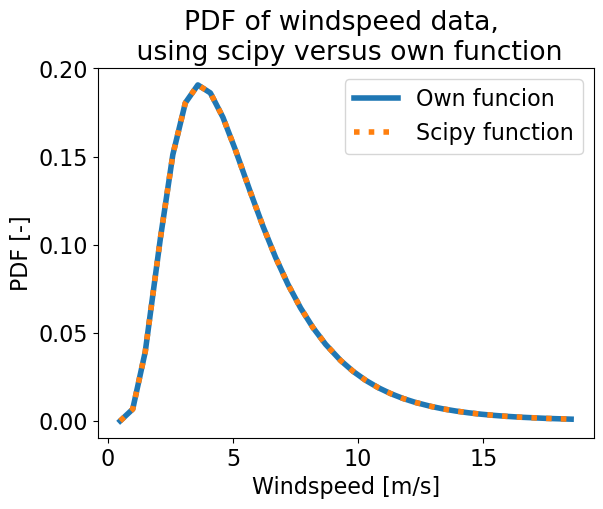

In [5]:
# Comparing the PDFs of our own function and scipy function
p_func = PDF(x=data, sigma_y=sigma_y, mu_y=mu_y)
p_scipy = lognorm.pdf(data, s=sigma_y, loc=loc_new, scale=scale_new)

plt.figure()
plt.plot(data, p_func, label='Own funcion')
plt.plot(data, p_scipy, ':', label='Scipy function')
plt.title('PDF of windspeed data, \n using scipy versus own function')
plt.xlabel('Windspeed [m/s]')
plt.ylabel('PDF [-]')
plt.legend()
plt.show()

## Part 2: Use your functions

Using the functions written above, the following is computed.
a. $P(x\leq 3.0\, \text{m/s})=?$  
b. $P(x\geq 10.0\, \text{m/s})=?$  
c. $P(3.0\, \text{m/s} \leq x \leq 10.0\, \text{m/s})=?$  
d. What is the probability that in a given year the wind speed exceeds $15.0\, \text{m/s}$?  
e. What is the wind speed such that probability of exceedance is $1\%$ per year?

For each subquestion, also the result of using the scipy package is computed, to check whether our functions are correct. The results are named as P_subquestion letter_method, in which the method is either our own function (func) or the scipy package (scipy). For subquesion e x is used instead of P because a wind speed is computed instead of a probability.

<div class="alert alert-block alert-warning">
    <b>Explanation: inverse CDF</b>  
    
    
THe CDF for the lognormal distribution (just like the normal distribution) does not have a closed form equation, so it must be solved numerically. This is done automatically in the scipy functions, but is illustrated for you below to be consistent with the instructions to not use scipy. You can refer to the documentation of the function, <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html">fsolve</a>, to learn more, but basically the function find the roots of CDF_solve_func.
The value 10 is an estimated guess (which you deduce from the data) and the -0.01 is needed to obtain the function corresponding to the probability of exceedance corresponding to 1%.
</div>

In [ ]:
# a
P_a_func = CDF(x=[3], sigma_y=sigma_y, mu_y=mu_y)[0]
P_a_scipy = lognorm.cdf(3, s=sigma_y, loc=loc_new, scale=scale_new)

# b
P_b_func = CDF_complement(x=[10], sigma_y=sigma_y, mu_y=mu_y)[0]
P_b_scipy = 1 - lognorm.cdf(10, s=sigma_y, loc=loc_new, scale=scale_new)

# c
P_c_func = 1 - P_a_func - P_b_func
P_c_scipy = 1 - P_a_scipy - P_b_scipy

# d 
P_d_func = CDF_complement(x=[15], sigma_y=sigma_y, mu_y=mu_y)[0]
P_d_scipy = 1 - lognorm.cdf(15, s=sigma_y, loc=loc_new, scale=scale_new)

# e
def inv_CDF_solve_func(x):
    """Solve inverse CDF numerically."""
    cdf_value = CDF_complement(x=[x], sigma_y=sigma_y, mu_y=mu_y)
    return cdf_value[0] - 0.01
x_e_func = fsolve(inv_CDF_solve_func, 10)[0]

def inv_CDF_solve_scipy(x):
    """Solve inverse CDF scipy numerically."""
    cdf_value = 1 - lognorm.cdf(x, s=sigma_y, loc=loc_new, scale=scale_new)
    return cdf_value - 0.01
x_e_scipy = fsolve(inv_CDF_solve_scipy, 10)[0]

headers = ['Question', 'Own function', 'Scipy function']

question = ['P(x < 3 m/s)', 'P(x > 10 m/s)', 'P(3 < x < 10 m/s)',
            'P(x > 15 m/s)', 'x for P(x) = 0.01']
func = [f'{P_a_func:.3f}', f'{P_b_func:.3f}', f'{P_c_func:.3f}',
        f'{P_d_func:.3f}', f'{x_e_func:.3f} m/s']
scipy = [f'{P_a_scipy:.3f}', f'{P_b_scipy:.3f}', f'{P_c_scipy:.3f}',
         f'{P_d_scipy:.3f}', f'{x_e_scipy:.3f} m/s']
table = []

for i in range(len(question)):
  table.append([question[i], func[i], scipy[i]])

print(tabulate(table, headers=headers))

## Part 3: Plot your functions

Here a plot of the PDF, CDF and Exceedance probability are created. Also a representation of the mean and standard deviation of the wind speed data are included in the plots. For the exceedance probability a semi-logarithmic set of axes is used, where exceedance probability is plotted with the logarithmic axis.
For the PDF and CDF also the histogram of the data is plotted. The exceedance probability is computed using the inverse CDF function.

In [ ]:
plt.figure(figsize=(7, 5))
plt.hist(data, bins=15, density=True, edgecolor='black', label='Histogram')
plt.plot(data, PDF(x=data, sigma_y=sigma_y, mu_y=mu_y), label='PDF')
plt.axvline(mu_x, color='red', label='Mean')
plt.axvline(mu_x - sigma_x,
            ls=':', color='black', label=r'1$\sigma$ confidence')
plt.axvline(mu_x + sigma_x, ls=':', color='black')
plt.title('PDF and histogram of windspeed')
plt.xlabel('Windspeed [m/s]')
plt.ylabel('Density [-]')
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(7, 5))
plt.hist(data, 
         bins=15, density=True, edgecolor='black', cumulative=True, 
         label='Histogram')
plt.plot(data, CDF(x=data, sigma_y=sigma_y, mu_y=mu_y), label='CDF')
plt.axvline(mu_x, color='red', label='Mean')
plt.axvline(mu_x - sigma_x,
            ls=':', color='black', label=r'1$\sigma$ confidence')
plt.axvline(mu_x + sigma_x, ls=':', color='black')
plt.title('CDF and cumulative histogram of windspeed')
plt.xlabel('Windspeed [m/s]')
plt.ylabel('Density [-]')
plt.legend()
plt.show()

In [ ]:
def ecdf(var):
    x = np.sort(var)
    n = x.size
    f = np.arange(1, n+1)/n
    return x, f

data_sorted, empirical_cdf = ecdf(data)

plt.figure(figsize=(7, 5))
plt.plot(data, CDF_complement(x=data, sigma_y=sigma_y, mu_y=mu_y), 
         label='Exceedance probability')
plt.plot(data_sorted, 1-empirical_cdf, 
         label='Empirical exceedance')
plt.axvline(mu_x, color='red', label='Mean')
plt.axvline(mu_x - sigma_x, ls=':', color='black', 
            label=r'1$\sigma$ confidence')
plt.axvline(mu_x + sigma_x, ls=':', color='black')
plt.title('Exceedance plot of windspeed data')
plt.xlabel('Windspeed [m/s]')
plt.ylabel('Exceedance probability[-]')
plt.yscale('log')
plt.legend()
plt.show()

## Bonus: Docstrings

<div class="alert alert-block alert-success">
This section repeats the code above, but now gives an example of docstrings that are more than one line. Docstrings are introduced in the Golden Rules, but will come back again in a later workshop.
</div>

In [ ]:
def PDF(x, sigma_y, mu_y):
    '''Compute probability density function
    
    Parameters:
        x: array_like
            value(s) for which to compute p(x)
        sigma_y: float
            scale parameter of the distribution
        mu_y: float 
            location parameter of the distribution
    Returns:
        p: array_like
            probability density value(s) for input x
    '''
    p = 1/(sigma_y*x*np.sqrt(2*np.pi))*\
        np.exp(-(np.log(x)- mu_y)**2/(2*sigma_y**2))
    return p


def CDF(x, sigma_y, mu_y):
    '''Compute the cumulative density with quad function
    
    Compute the cumulative density function, using the quad function
    from scipy.integrate.
    
    Parameters:
        x: array_like
            value(s) for which to compute P(x)
        sigma_y: float
            scale parameter of the distribution
        mu_y: float 
            location parameter of the distribution
    Returns:
        p: array_like
            cumulative density value(s) for input x
    '''
    cdflist = []
    f = lambda x:1/(np.sqrt(2*np.pi))*np.exp(-(x**2/2))
    for i in range(len(x)):
        cdf = quad(f, -np.inf, (np.log(x[i]) - mu_y)/sigma_y)
        cdflist.append(cdf)
    return np.array(cdflist)[:,0]


def CDF_complement(x, sigma_y, mu_y):
    '''Compute inverse cumulative density with quad function
    
    Compute the inverse cumulative density function, using the quad function
    from scipy.integrate.
    
    Parameters:
        x: array_like
            value(s) for which to compute P(x)
        sigma_y: float
            scale parameter of the distribution
        mu_y: float 
            location parameter of the distribution
    Returns:
        p: array_like
            inverse cumulative density value(s) for input x
    '''
    cdflist = CDF(x=x, sigma_y=sigma_y, mu_y=mu_y)
    return np.ones(len(cdflist)) - cdflist

## Bonus: Plotting functions

If you want to make a similar plot more often for different datasets or parts of your dataset, a plotting function could be useful. With a plotting function you can generate a new plot in just one line instead of copy-pasting your whole plotting code for every plot you want to make. 

In [ ]:
def PDF_plot(data, sigma_y, mu_y, data_name, data_unit):
    '''Plot PDF and histogram of data for lognormal distribution
    
    Parameters:
        data: array_like
            input data of which the PDF is plotted
        sigma_y: float
            scale parameter of the distribution
        mu_y: float 
            location parameter of the distribution
        data_name: string
            descriptive name of the data used for title 
            and axis names of the plot
        data_unit: string
            physical unit of the input data
    
    The function returns a plot of the PDF and histogram of the data, along with
    vertical lines that visualize the mean and standard deviation of the dataset
    '''
    plt.figure()
    plt.hist(data, bins=15, density=True, edgecolor='black', label='Histogram')
    plt.plot(data, PDF(x=data, sigma_y=sigma_y, mu_y=mu_y), label='PDF')
    mu_x = np.mean(data)
    sigma_x = np.std(data)
    plt.axvline(mu_x, color='red', label='Mean')
    plt.axvline(mu_x - sigma_x, ls=':', color='black', 
                label=r'1$\sigma$ confidence')
    plt.axvline(mu_x + sigma_x, ls=':', color='black')
    plt.title(f'PDF and histogram of {data_name}')
    plt.xlabel(f'{data_name} [{data_unit}]')
    plt.ylabel('Density [-]')
    plt.legend()
    plt.show()
    return

def CDF_plot(data, sigma_y, mu_y, data_name, data_unit):
    '''Plot CDF and cumulative histogram of data for lognormal distribution
    
    Parameters:
        data: array_like
            input data of which the PDF is plotted
        sigma_y: float
            scale parameter of the distribution
        mu_y: float 
            location parameter of the distribution
        data_name: string
            descriptive name of the data used for title 
            and axis names of the plot
        data_unit: string
            physical unit of the input data
    
    The function returns a plot of the CDF and cumulative histogram of the data,
    along with vertical lines that visualize the mean and standard deviation of 
    the dataset
    '''
    plt.figure()
    plt.hist(data, bins=15, density=True, edgecolor='black', cumulative=True,
             label='Histogram')
    plt.plot(data, CDF(x=data, sigma_y=sigma_y, mu_y=mu_y), label='CDF')
    mu_x = np.mean(data)
    sigma_x = np.std(data)
    plt.axvline(mu_x, color='red', label='Mean')
    plt.axvline(mu_x - sigma_x, ls=':', color='black', 
                label=r'1$\sigma$ confidence')
    plt.axvline(mu_x + sigma_x, ls=':', color='black')
    plt.title(f'CDF and cumulative histogram of {data_name}')
    plt.xlabel(f'{data_name} [{data_unit}]')
    plt.ylabel('Density [-]')
    plt.legend()
    plt.show()
    return

def exceedance_plot(data, sigma_y, mu_y, data_name, data_unit):
    '''Plot exceedance and empirical distribution for lognormal.
    
    Parameters:
        data: array_like
            input data of which the PDF is plotted
        sigma_y: float
            scale parameter of the distribution
        mu_y: float 
            location parameter of the distribution
        data_name: string
            descriptive name of the data used for title 
            and axis names of the plot
        data_unit: string
            physical unit of the input data
    
    The function returns an exceedance plot of the data in semi-log scale, along
    with vertical lines that visualize the mean and standard deviation of the 
    dataset
    '''
    plt.figure()
    plt.plot(data, CDF_complement(x=data, sigma_y=sigma_y, mu_y=mu_y), 
             label='Exceedance probability')
    mu_x = np.mean(data)
    sigma_x = np.std(data)
    plt.axvline(mu_x, color='red', label='Mean')
    plt.axvline(mu_x - sigma_x, ls=':', color='black', 
                label=r'1$\sigma$ confidence')
    plt.axvline(mu_x + sigma_x, ls=':', color='black')
    plt.title(f'Exceedance plot of {data_name}')
    plt.xlabel(f'{data_name} [{data_unit}]')
    plt.ylabel('Density [-]')
    plt.yscale('log')
    plt.legend()
    plt.show()
    return


In [ ]:
PDF_plot(data=data, sigma_y=sigma_y, mu_y=mu_y, data_name='Wind speed', 
         data_unit='m/s')

In [ ]:
CDF_plot(data=data, sigma_y=sigma_y, mu_y=mu_y, data_name='Wind speed', 
         data_unit='m/s')

In [ ]:
exceedance_plot(data=data, sigma_y=sigma_y, mu_y=mu_y, data_name='Wind speed', 
                data_unit='m/s')

In [ ]:
def plot_function(data, sigma_y, mu_y, data_name, data_unit, type):
    '''Plot PDF, CDF, exceedance with data for lognormal
    
    Parameters:
        data: array_like
            input data of which the plot is made
        sigma_y: float
            scale parameter of the distribution
        mu_y: float 
            location parameter of the distribution
        data_name: string
            descriptive name of the data used for title 
            and axis names of the plot
        data_unit: string
            physical unit of the input data
        type: string
            'PDF' gives a plot of the PDF and histogram
            'CDF' gives a plot of the CDF and cumulative histogram
            'exceedance' gives an exceedance plot 
    
    The function returns a plot of the chose type, along with vertical lines 
    that visualize the mean and standard deviation of the dataset
    '''
    plt.figure()
    if type == 'PDF':
        plt.hist(data, bins=15, density=True, edgecolor='black', 
                 label='Histogram')
        plt.plot(data, PDF(x=data, sigma_y=sigma_y, mu_y=mu_y), label='PDF')
        plt.title(f'PDF and histogram of {data_name}')
        plt.xlabel(f'{data_name} [{data_unit}]')
        plt.ylabel('Density [-]')
    elif type == 'CDF':
        plt.hist(data, bins=15, density=True, edgecolor='black', 
                 cumulative=True, label='Histogram')
        plt.plot(data, CDF(x=data, sigma_y=sigma_y, mu_y=mu_y), label='CDF')
        plt.title(f'CDF and cumulative histogram of {data_name}')
        plt.xlabel(f'{data_name} [{data_unit}]')
        plt.ylabel('Density [-]')
    elif type == 'exceedance':
        plt.plot(data, CDF_complement(x=data, sigma_y=sigma_y, mu_y=mu_y), 
             label='Exceedance probability')
        plt.title(f'Exceedance plot of {data_name}')
        plt.xlabel(f'{data_name} [{data_unit}]')
        plt.ylabel('Density [-]')
        plt.yscale('log')
    else:
        raise TypeError(
            "Type should be  'PDF', 'CDF', or 'exceedance'"
        )
        
    mu_x = np.mean(data)
    sigma_x = np.std(data)
    plt.axvline(mu_x, color='red', label='Mean')
    plt.axvline(mu_x - sigma_x, ls=':', color='black', 
                label=r'1$\sigma$ confidence')
    plt.axvline(mu_x + sigma_x, ls=':', color='black')
    plt.legend()
    plt.show()
    return

In [ ]:
plot_function(data, sigma_y, mu_y, data_name='wind_speed', data_unit='m/s', 
              type='PDF')

In [ ]:
plot_function(data, sigma_y, mu_y, data_name='wind_speed', data_unit='m/s', 
              type='CDF')

In [ ]:
plot_function(data, sigma_y, mu_y, data_name='wind_speed', data_unit='m/s', 
              type='exceedance')

In [ ]:
# Our function only works if we choose the right type
plot_function(data, sigma_y, mu_y, data_name='wind_speed', data_unit='m/s', 
              type='CDF_complement')

*Yes, the previous cell is supposed to return an error.*